In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

# Single Learning Rate

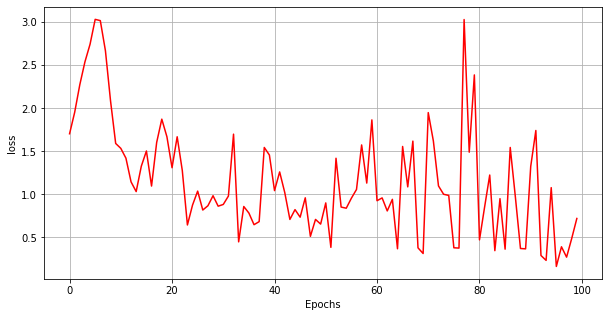

In [2]:
# Validation loss
val_loss = np.load('./data/ResNet50_loss0-100.npy')

plt.figure(figsize=(10,5))
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.plot(val_loss,color='red')

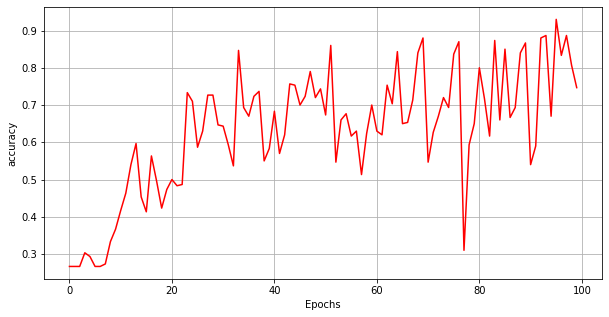

In [3]:
# Validation loss
val_acc = np.load('./data/ResNet50_acc0-100.npy')

plt.figure(figsize=(10,5))
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.plot(val_acc,color='red')

In [4]:
# Max Accuracy reached
print(np.max(val_acc))
np.argmax(val_acc)

0.93


95

# Learning Rate Decay

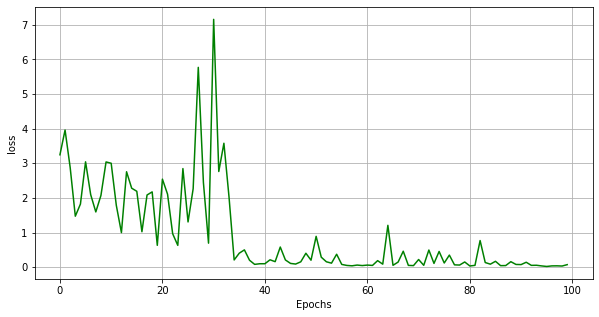

In [5]:
# Validation loss
val_loss2 = np.load('./data/ResNet50lrD_loss0-100.npy')

plt.figure(figsize=(10,5))
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.plot(val_loss2,color='green')

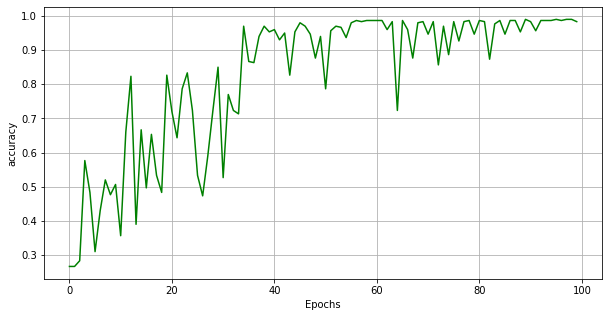

In [6]:
# Validation accuracy
val_acc2 = np.load('./data/ResNet50lrD_acc0-100.npy')

plt.figure(figsize=(10,5))
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.plot(val_acc2,color='green')

In [7]:
# Max Accuracy reached
print(np.max(val_acc2))
np.argmax(val_acc2)

0.99


89

# Step Reduced Learning Rate

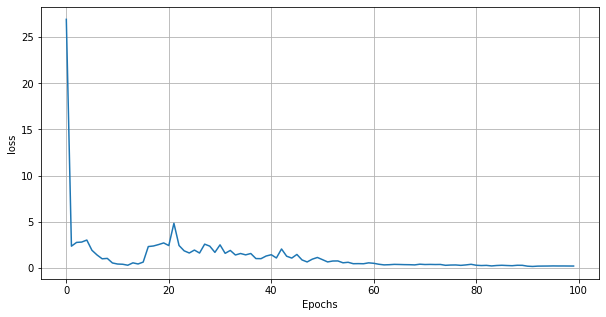

In [8]:
# Validation loss
val_loss3 = np.load('./data/ResNet50Srlr_loss0-100.npy')

plt.figure(figsize=(10,5))
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.plot(val_loss3)

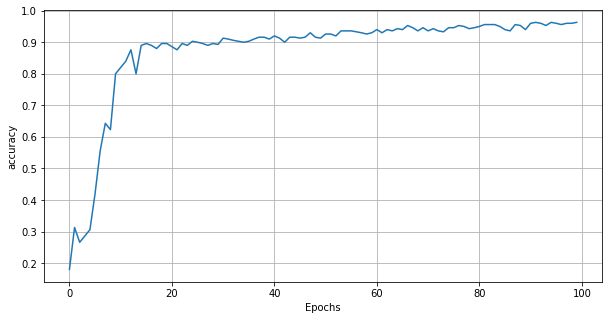

In [9]:
# Validation loss
val_acc3 = np.load('./data/ResNet50Srlr_acc0-100.npy')

plt.figure(figsize=(10,5))
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.plot(val_acc3)

In [10]:
# Max Accuracy reached
print(val_acc3.max())
np.argmax(val_acc3)

0.963


91

# Comparing the methods

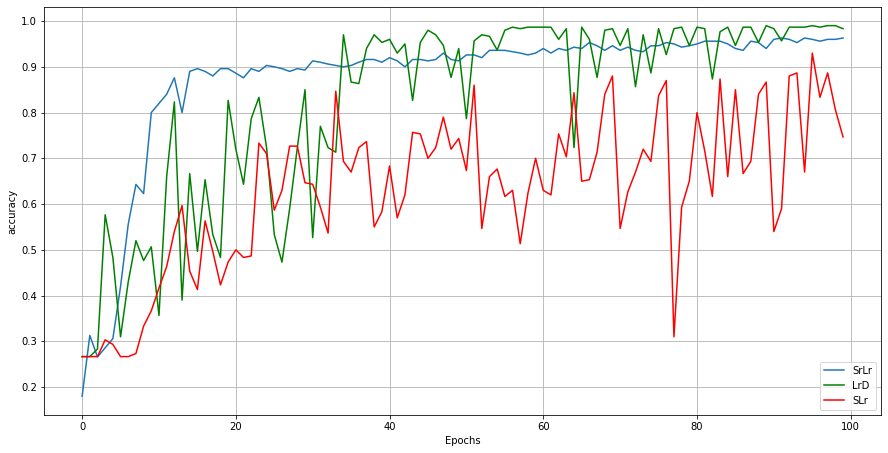

In [11]:
plt.figure(figsize=(15,7.5))
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.plot(val_acc3, label='SrLr')
plt.plot(val_acc2, color='green', label='LrD')
plt.plot(val_acc, color='red', label='SLr')
plt.legend(loc="lower right")

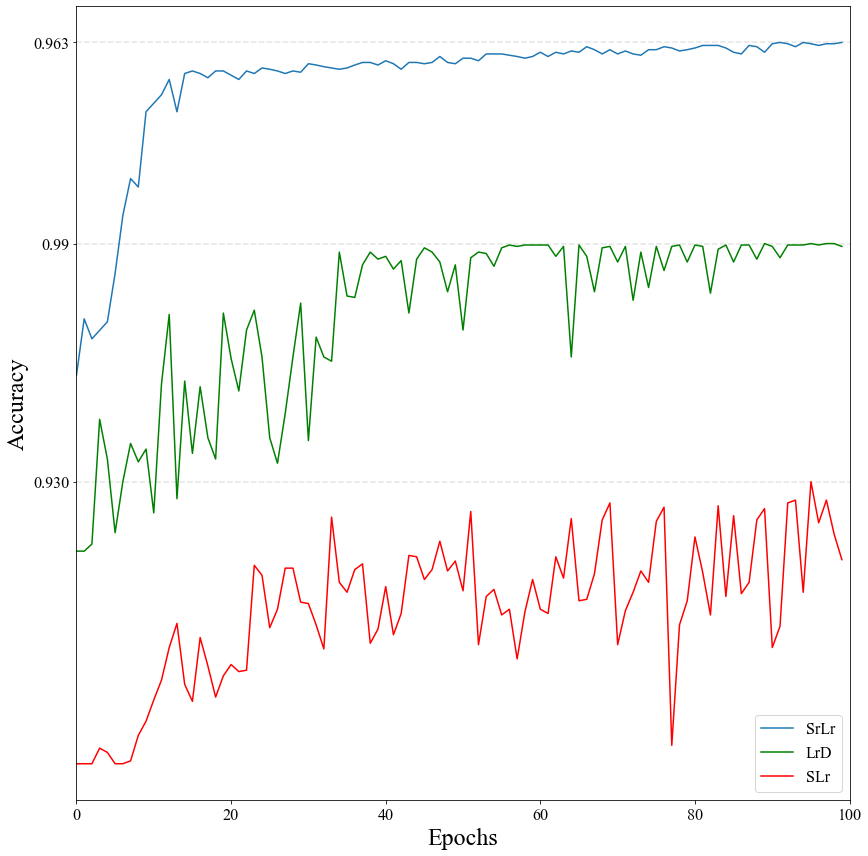

In [16]:
plt.rcParams["font.family"] = "Times New Roman"
plt.figure(figsize=(12,12))
#plt.grid()
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.plot(val_acc3+1, label='SrLr')
plt.plot(val_acc2+.5, color='green', label='LrD')
plt.plot(val_acc, color='red', label='SLr')
plt.legend(loc="lower right")
plt.xlabel('Epochs', fontsize=24)
plt.ylabel('Accuracy', fontsize=24)
plt.legend(loc="lower right",prop={'size': 16})
plt.rcParams['xtick.labelsize']=16
plt.rcParams['ytick.labelsize']=16
plt.yticks([val_acc.max(),max(val_acc2)+.5,max(val_acc3)+1],["{0:.3f}".format(val_acc.max()),max(val_acc2),max(val_acc3)])
plt.hlines(y=max(val_acc3)+1, xmin=0, xmax=100, color='black', linestyle='--',alpha=0.1)#, color='black')
plt.hlines(y=max(val_acc2)+.5, xmin=0, xmax=100, color='black', linestyle='--',alpha=0.1)#, color='black')
plt.hlines(y=max(val_acc), xmin=0, xmax=100, color='black', linestyle='--',alpha=0.1)#, color='black')
# plt.axvline(y=.75, ls='-', color='black')
#plt.savefig('learning_rates.png')
plt.tight_layout()
plt.margins(x = 0, y= .05)
plt.savefig('resnet50_acc.png')

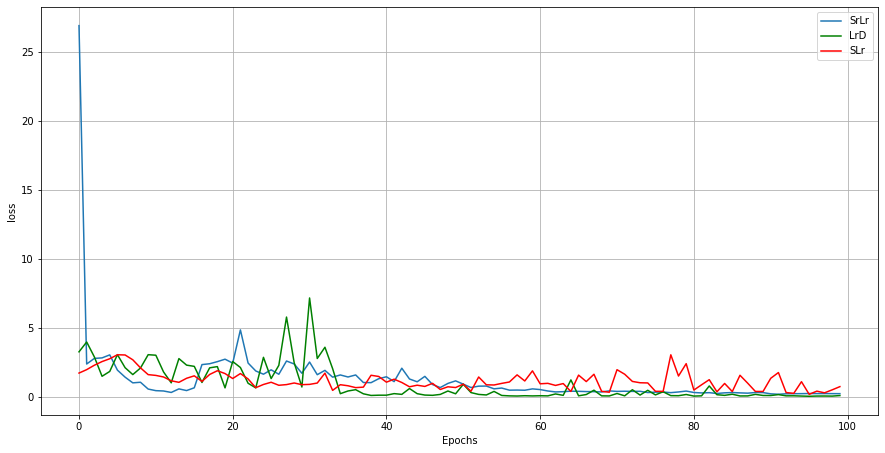

In [12]:
plt.figure(figsize=(15,7.5))
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.plot(val_loss3, label='SrLr')
plt.plot(val_loss2, color='green', label='LrD')
plt.plot(val_loss, color='red', label='SLr')
plt.legend(loc="upper right")

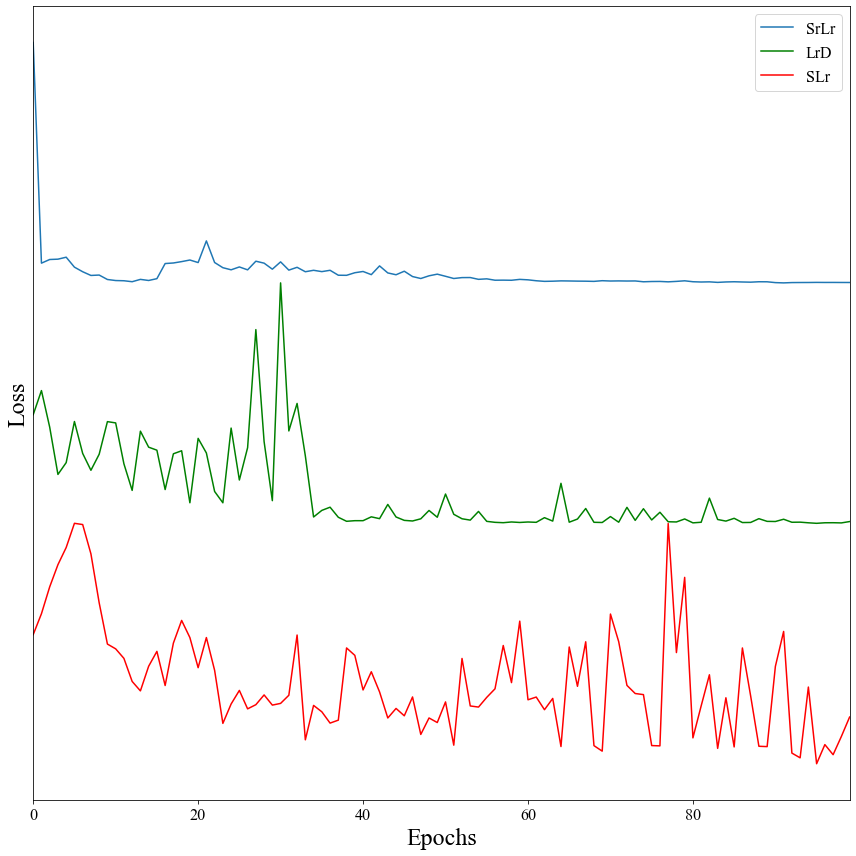

In [19]:
def normalize(l):
    return (l-min(l))/(max(l)-min(l))

plt.rcParams["font.family"] = "Times New Roman"
plt.figure(figsize=(12,12))
#plt.grid()
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.plot(normalize(val_loss3)+2, label='SrLr')
plt.plot(normalize(val_loss2)+1, color='green', label='LrD')
plt.plot(normalize(val_loss), color='red', label='SLr')
#plt.legend(loc="lower right")
plt.xlabel('Epochs', fontsize=24)
plt.ylabel('Loss', fontsize=24)
plt.legend(loc="upper right",prop={'size': 16})
plt.rcParams['xtick.labelsize']=16
plt.rcParams['ytick.labelsize']=16
plt.yticks([])
# plt.hlines(y=max(val_acc3)+1, xmin=0, xmax=100, color='black', linestyle='--',alpha=0.1)#, color='black')
# plt.hlines(y=max(val_acc2)+.5, xmin=0, xmax=100, color='black', linestyle='--',alpha=0.1)#, color='black')
# plt.hlines(y=max(val_acc), xmin=0, xmax=100, color='black', linestyle='--',alpha=0.1)#, color='black')
# plt.axvline(y=.75, ls='-', color='black')
#plt.savefig('learning_rates.png')
plt.tight_layout()
plt.margins(x = 0, y= .05)
plt.savefig('resnet50_loss.png')